# IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# IMPORT DATASET

In [ ]:
df = pd.read_csv("Salary_Data.csv")

In [ ]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [ ]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [ ]:
df.shape

(30, 2)

In [ ]:
# Descritive Statistics

df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


# HANDLING NULL VALUES

In [ ]:
df.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [ ]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# SEPARATION OF DEPENDENT AND INDEPENDENT VARIABLES

In [ ]:
X = df.iloc[:, :1]

In [ ]:
type(X)

pandas.core.frame.DataFrame

In [ ]:
X.head()

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2


In [ ]:
#Y = df.iloc[:,1:] #if we use this syntax, then Y will become a dataframe instead of series

# We need X as dataframe and Y as Series, so use any one of the 2 following commands:
Y = df["Salary"]
#Y = df.iloc[:,1]

In [ ]:
type(Y)

pandas.core.series.Series

In [ ]:
Y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

Text(0, 0.5, 'Y')

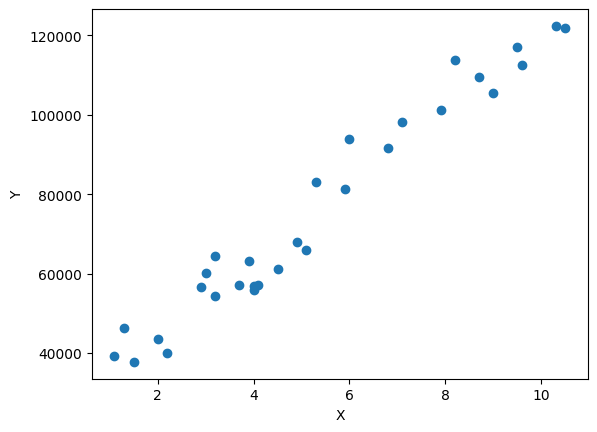

In [ ]:
plt.scatter(X,Y)
plt.xlabel("X")
plt.ylabel("Y")

# TRAIN TEST SPLIT

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

In [ ]:
X_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [ ]:
X_train.shape

(24, 1)

In [ ]:
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(24,)
(6, 1)
(6,)


# `MODEL BUILDING`


```
1) Train the model.
2) Test the model.
3) Evaluate the model.
```



In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# y = mx+c
lr.coef_

array([9312.57512673])

In [ ]:
# y = mx+c
lr.intercept_

26780.09915062818

# Test the model

In [ ]:
Y_pred = lr.predict(X_test)

In [ ]:
Y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [ ]:
Y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64

# EVALUATION OF MODEL

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# calculating R2 score

r2 = r2_score(Y_test, Y_pred)
r2

0.988169515729126

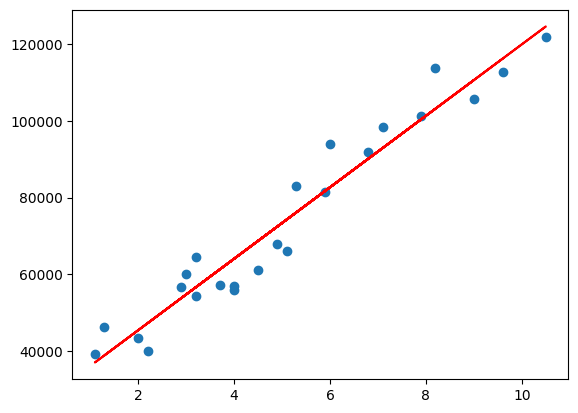

In [ ]:
plt.scatter(X_train, Y_train)
plt.plot(X_train, lr.predict(X_train), color='red')

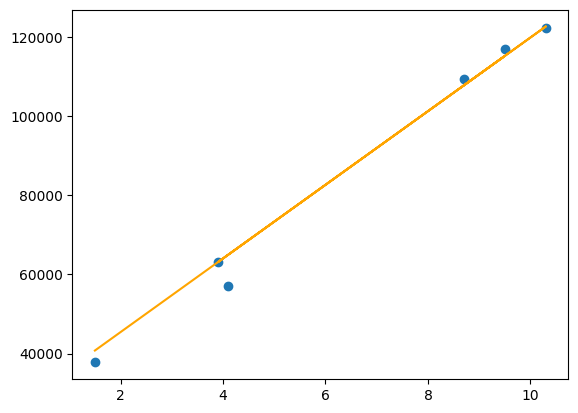

In [ ]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, lr.predict(X_test), color='orange')

In [ ]:
lr.predict([[7.8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([99418.18513912])